## **9장. 상관관계 분석**

In [ ]:
#상관관계 분석(Correlation analysis, 상관분석) : 두 변수 사이의 관계의 강도와 방향을 파악하는 통계 기법
# - 상관분석 : 상관관계를 수치로 나타내어 정량화하는 방법
# - 상관계수(Correlation coefficient) : 상관관계의 강도를 나타낸 수치, -1 이상 1 이하의 값
# 양의 상관관계 : 변수 x가 커질수록 변수 y도 커진다.
# 음의 상관관계 : 변수 x가 커질수록 변수 y는 작아진다.
# 상관관계 없음 : 변수 x가 커질 때 변수 y는 커질 수도, 작아질 수도 있다.
# 0.5 < 상관계수 <= 1 -> 강한 상관관계, |상관계수| < 0.5 -> 약한 상관관계

#상관관계 분석 방법
# - 피어슨 상관분석(Pearson correlation analysis) : 가장 일반적
# - 스피어만 상관분석(Spearman correlation analysis) : 두 변수가 정규성(Nomality)을 보이지 않을 때 사용
# - 켄달 상관분석(Kendall correlation analysis) : 표본데이터가 적고 동점이 많을 때 사용하기 적합함

In [ ]:
#피어슨 상관분석

import pandas as pd
engListening = [30, 60, 90]
engScore = [70, 80, 90]

data = {'engListening' : engListening, 'engScore' : engScore}
df = pd.DataFrame(data)

#상관분석 수행하기
coef = df.corr(method = 'pearson')
print(coef)

              engListening  engScore
engListening           1.0       1.0
engScore               1.0       1.0


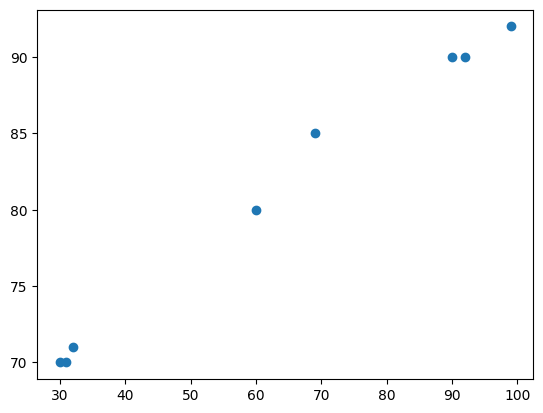

In [ ]:
import matplotlib.pyplot as plt

engListening = [30, 60, 90, 31, 32, 69, 92, 99]
engScore = [70, 80, 90, 70, 71, 85, 90, 92]
data2 = {'engListening' : engListening, 'engScore' : engScore}
df2 = pd.DataFrame(data2)

plt.scatter(df2['engListening'], df2['engScore'])
plt.show()

In [ ]:
coef = df2.corr(method = 'pearson')
print(coef)

              engListening  engScore
engListening      1.000000  0.995829
engScore          0.995829  1.000000


In [ ]:
#스피어만 상관분석과 켄달 상관분석
spearmanCoef = df2.corr(method = 'spearman')
print(spearmanCoef)

kendallCoef = df2.corr(method = 'kendall')
print(kendallCoef)

              engListening  engScore
engListening      1.000000  0.988024
engScore          0.988024  1.000000
              engListening  engScore
engListening      1.000000  0.963624
engScore          0.963624  1.000000


In [ ]:
#데이터 추가

engListening = [30, 60, 90, 31, 32, 69, 92, 99]
engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engClass = [60, 120, 120, 60, 60, 180, 120, 120]
engScore = [70, 80, 90, 70, 71, 85, 90, 92]

data3 = {'engListening' : engListening, 'engReading' : engReading, 'endClass':engClass, 'engScore' : engScore}
df3 = pd.DataFrame(data3)
df3

,engListening,engReading,endClass,engScore
0,30,40,60,70
1,60,45,120,80
2,90,60,120,90
3,31,20,60,70
4,32,15,60,71
5,69,70,180,85
6,92,60,120,90
7,99,80,120,92


In [ ]:
#상관분석 결과
pearsonCoef = df3.corr(method = 'pearson')
print(pearsonCoef)

spearmanCoef = df3.corr(method = 'spearman')
print(spearmanCoef)

kendallCoef = df3.corr(method = 'kendall')
print(kendallCoef)

              engListening  engReading  endClass  engScore
engListening      1.000000    0.877201  0.703028  0.995829
engReading        0.877201    1.000000  0.808755  0.894111
endClass          0.703028    0.808755  1.000000  0.759453
engScore          0.995829    0.894111  0.759453  1.000000
              engListening  engReading  endClass  engScore
engListening      1.000000    0.826362  0.717256  0.988024
engReading        0.826362    1.000000  0.852757  0.848500
endClass          0.717256    0.852757  1.000000  0.725950
engScore          0.988024    0.848500  0.725950  1.000000
              engListening  engReading  endClass  engScore
engListening      1.000000    0.618284  0.563621  0.963624
engReading        0.618284    1.000000  0.750568  0.679366
endClass          0.563621    0.750568  1.000000  0.584898
engScore          0.963624    0.679366  0.584898  1.000000


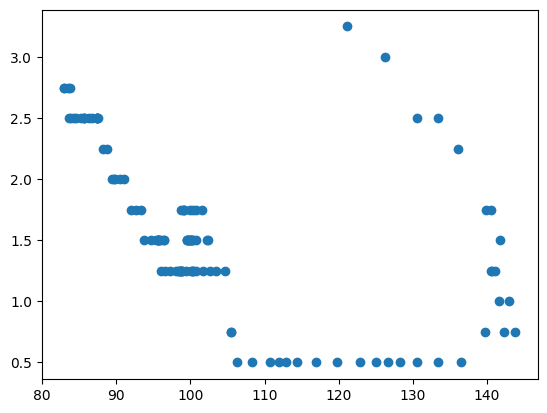

In [3]:
#상관관계 분석의 활용 - 기준금리와 부동산 매매가격

#데이터 준비

import pandas as pd
import matplotlib.pyplot as plt

realEstate = [83, 83, 83.5, 83.8, 83.9, 83.7, 84.3, 84.6, 85.2, 85.7, 85.7, 85.7, 86.3
               , 86.8, 87.4, 87.4, 87.4, 87.4, 87.6, 88.2, 88.8, 89.4, 89.7, 89.9, 90.5
               , 91.1, 92, 92.7, 93.3, 93.8, 94.7, 95.4, 96, 96.4, 96.4, 95.8, 95.7
               , 95.8, 95.7, 95.7, 95.7, 96, 96.6, 97.2, 98.1, 98.8, 98.9, 98.6, 98.3
               , 98.5, 98.7, 98.6, 98.9, 99.4, 100.1, 100.2, 100.3, 100.3, 100, 99.6
               , 99.8, 100.1, 100.2, 100.2, 99.9, 99.7, 99.6, 100.8, 102.2, 102.4
               , 101.6, 100.8, 100.3, 99.9, 99.2, 99, 98.8, 99.1, 99.6, 99.9, 100.3
               , 100.8, 101.7, 102.7, 103.4, 104.7, 105.5, 105.5, 106.3, 108.3, 110.7
               , 112, 112.9, 114.4, 117, 119.8, 122.9, 125.1, 126.7, 128.3, 130.5
               , 133.4, 136.5, 139.7, 142.3, 143.8, 143, 141.6, 140.7, 140.6, 141.1
               , 141.8, 140.5, 139.8, 136.1, 133.4, 130.6, 126.2, 121.1]
interestRate = [2.75, 2.75, 2.75, 2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5
               , 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2, 2, 2, 2, 2, 1.75, 1.75
               , 1.75, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.25
               , 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25
               , 1.25, 1.25, 1.25, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5
               , 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.5
               , 1.5, 1.5, 1.25, 1.25, 1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5
               , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
               , 0.75, 0.75, 0.75, 1, 1, 1.25, 1.25, 1.25, 1.5, 1.75, 1.75, 2.25, 2.5, 2.5
               , 3, 3.25]
data = {'부동산':realEstate, '금리':interestRate}

plt.scatter(data['부동산'], data['금리'])
plt.show()

In [4]:
#피어슨 상관분석
df = pd.DataFrame(data)
coef = df.corr(method = 'pearson')
print(coef)
# 두 변수의 상관계수 값 = -0.497677, 절댓값이 0.5에 가까운 음의 선형관계
# 기준금리가 오를수록 부동산 가격이 낮아지고, 기준금리가 내릴수록 부동산 가격이 높아진다.

          부동산        금리
부동산  1.000000 -0.497677
금리  -0.497677  1.000000


In [7]:
#부동산 상승기 상관분석
originalData = {'부동산': realEstate, '금리' : interestRate}
#print(originalData)

realEstateIndexList = []
interestList = []
lastIndex = -1

#부동산 지수가 143.8이 될때까지만 리스트에 데이터 추가하기
for key, value in originalData.items():
  if key == '부동산' :
    for i in range(0, len(value)):
      if value[i] == 143.8:
        break
      else:
        realEstateIndexList.append(value[i])
        lastIndex = i
  else:
    for i in range(0, lastIndex + 1):
      interestList.append(value[i])

data = {'지수' : realEstateIndexList, '금리' : interestList}
df = pd.DataFrame(data)
coef = df.corr(method = 'pearson')
print(coef)
# 피어슨 상관계수 = -0.854603 : 강한 음의 상관관계
# 기준금리가 오를 때 부동산 지수는 내려가고, 금리가 내려갈 때 부동산 지수는 올라감 -> 이 분석에는 두 가지 한계 존재
# - 기준금리 하나만으로 부동산 거래 가격을 단정지을 수 없음
# - 금리가 오르고 부동산 지수가 내려가는 데이터가지 포함했을 때, 상관계수의 절댓값이 비교적 낮음.
#       기준금리가 오르기까지 13개월이 소요된 데 반하여, 기준금리가 떨어지기까지 7년 3개월이 걸림
#       기준금리가 더 짧은 시간에 오르면서 부동산 지수 데이터가 상대적으로 듬성듬성 채워졌다
#       -> ChatGPT 답변 : 특정 기간 동안의 부동산 데이터가 일정하지 않고 불규칙하게 수집되었다는 것을 나타냅니다.
#                         이는 부동산 시장의 데이터가 일관된 주기나 패턴을 가지지 않고, 특정 이벤트나 요인에 의해 영향을 받아 듬성듬성하게 기록되었다는 것을 의미합니다.
#                         이러한 듬성듬성한 데이터는 통계적 분석이나 모델링에서 예측의 정확성을 저하시킬 수 있습니다.

          지수        금리
지수  1.000000 -0.854603
금리 -0.854603  1.000000


In [8]:
#영어 성적과 수학 성적

import pandas as pd
data = {'영어' : [4,2,1,3,10,8,9,7,6,5],
        '수학' : [2,1,3,4,8,7,10,5,9,6]}
df = pd.DataFrame(data)
coef = df.corr(method='spearman')
print(coef)

          영어        수학
영어  1.000000  0.818182
수학  0.818182  1.000000


In [9]:
#GDP 성장률과 인구수의 상관관계 분석
data = {'국가' :['미국', '일본', '영국', '프랑스', '독일', '이탈리아', '캐나다',
                '대한민국', '러시아', '중국', '인도', '인도네시아', '아르헨티나',
                '브라질', '멕시코', '호주', '남아프리카공화국', '사우디아라비아',
                '튀르키예', '유럽연합(EU)'],
        'GDP 성장률' :[0.9, 0.6, 0.4, 0.5, 1.1, 1.7, 3.9, 1.4, -3.7, 2.9, 6.3,
                    5.01, 5.9, 3.6, 3.5, 5.9, 4.1, 5.4, 3.9, 1.9],
        '인구수' :[334, 125, 67.53, 67.65, 83.16, 59.24, 38.44, 51.74, 146, 1412,
                1380, 273, 45.81, 213, 126, 25.77, 60.14, 34.11, 84.68, 343]}

df = pd.DataFrame(data)
print(df)

          국가  GDP 성장률      인구수
0         미국     0.90   334.00
1         일본     0.60   125.00
2         영국     0.40    67.53
3        프랑스     0.50    67.65
4         독일     1.10    83.16
5       이탈리아     1.70    59.24
6        캐나다     3.90    38.44
7       대한민국     1.40    51.74
8        러시아    -3.70   146.00
9         중국     2.90  1412.00
10        인도     6.30  1380.00
11     인도네시아     5.01   273.00
12     아르헨티나     5.90    45.81
13       브라질     3.60   213.00
14       멕시코     3.50   126.00
15        호주     5.90    25.77
16  남아프리카공화국     4.10    60.14
17   사우디아라비아     5.40    34.11
18      튀르키예     3.90    84.68
19  유럽연합(EU)     1.90   343.00


In [10]:
pearsonCoef = df.corr(method='pearson')
print("Pearson Correlation Analysis")
print(pearsonCoef)

spearmanCoef = df.corr(method='spearman')
print("\nSpearman Correlation Analysis")
print(spearmanCoef)

kendallCoef = df.corr(method='kendall')
print("\nKendall Correlation Analysis")
print(kendallCoef)

# 상관계수의 절댓값이 모두 0.5에 못미침 : GDP 상승률과 인구수는 선형 상관관계가 없음
# 분석 한계점
# - 전 세계의 코로나19라는 특수한 요인이 작용한 시기의 전년대비 GDP 성장률임.
# -> 국가마다 코로나19 관련 정책이 상이하여 경제 성장률보다 국민의 안전을 우선으로 하는 국가와 그 반대인 국가가 있었음.
# - 표본수가 적음. -> 전 세계 200여 개 국가의 인구수와 GDF 성장률 관계를 추론하기에는 데이터가 부족

<ipython-input-10-9fba138c3d95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearsonCoef = df.corr(method='pearson')
<ipython-input-10-9fba138c3d95>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearmanCoef = df.corr(method='spearman')
<ipython-input-10-9fba138c3d95>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kendallCoef = df.corr(method='kendall')


Pearson Correlation Analysis
          GDP 성장률       인구수
GDP 성장률  1.000000  0.198924
인구수      0.198924  1.000000

Spearman Correlation Analysis
          GDP 성장률       인구수
GDP 성장률  1.000000 -0.196388
인구수     -0.196388  1.000000

Kendall Correlation Analysis
          GDP 성장률       인구수
GDP 성장률  1.000000 -0.137568
인구수     -0.137568  1.000000
